# LDDMM with Weight Estimation and Contrast Correction

In [1]:
import sys
sys.path.insert(0,'../') # add code directory to path
# import lddmm
import torch_lddmm
# import numpy
import numpy as np
# import nibabel for i/o
import nibabel as nib
# import matplotlib for display
import matplotlib.pyplot as plt

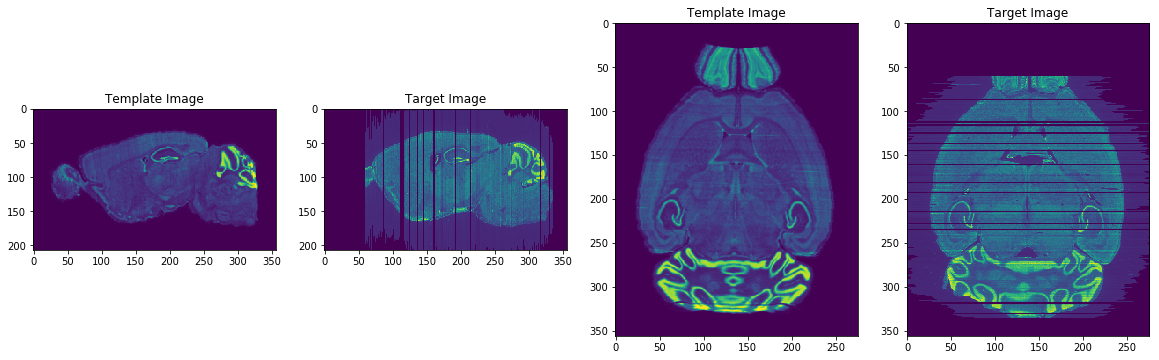

In [2]:
# load mouse brain histology images
template_file_name = '../notebook/mouse_template.img'
target_file_name = '../notebook/mouse_target.img'

template_image_struct = nib.load(template_file_name)
target_image_struct = nib.load(target_file_name)
dx = template_image_struct.header['pixdim'][1:4]

# load into numpy arrays
template_image = np.squeeze(template_image_struct.get_data()).astype(np.float32)
target_image = np.squeeze(target_image_struct.get_data()).astype(np.float32)

# display slices
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(template_image[:,:,100])
plt.title('Template Image')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(template_image[96,:,:])
plt.title('Template Image')
plt.subplot(1,4,4)
plt.imshow(target_image[96,:,:])
plt.title('Target Image')
plt.show()

## Run LDDMM, setting we=2 (estimating background and foreground channels) and cc=1 (linear contrast correction). We use optimizer 'gd' due to complex changes in matching energy.

In [23]:
# create LDDMM object
# here, we input the template and target arguments as lists of numpy arrays, one for each channel
# we also input the costmask variable as a numpy array, which is a matrix of weights on the matching term
lddmm = torch_lddmm.LDDMM(template=[template_image],target=[target_image],costmask=None,outdir='../notebook/',do_affine=0,do_lddmm=1,a=8,niter=150,epsilon=5e-3,sigma=[20.0],sigmaR=10.0,optimizer='gd',dx=dx, we=2, sigmaW=[20.0,10.0], nMstep=5, cc=1)


Current parameters:
>    a               = 8 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 150 (number of iterations)
>    epsilon         = 0.005 (gradient descent step size)
>    epsilonL        = 1e-07 (gradient descent step size, affine)
>    epsilonT        = 2e-05 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = [20.0] (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 10.0 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 0 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (index of CU

In [24]:
# run computation
lddmm.run()

iter: 0, E = 692.8502, ER = 0.0000, EM = 692.8502, epd = 0.005000.
iter: 1, E= 592.321, ER= 0.000, EM= 592.321, epd= 0.005, time= 1.50s.
iter: 2, E= 585.124, ER= 0.001, EM= 585.123, epd= 0.005, time= 1.61s.
iter: 3, E= 580.155, ER= 0.001, EM= 580.154, epd= 0.005, time= 1.56s.
iter: 4, E= 575.824, ER= 0.002, EM= 575.822, epd= 0.005, time= 1.57s.
iter: 5, E= 623.582, ER= 0.003, EM= 623.579, epd= 0.005, time= 1.58s.
iter: 6, E= 618.881, ER= 0.004, EM= 618.876, epd= 0.005, time= 1.58s.
iter: 7, E= 615.626, ER= 0.006, EM= 615.620, epd= 0.005, time= 1.55s.
iter: 8, E= 612.841, ER= 0.007, EM= 612.834, epd= 0.005, time= 1.56s.
iter: 9, E= 610.378, ER= 0.008, EM= 610.370, epd= 0.005, time= 1.56s.
iter: 10, E= 637.158, ER= 0.009, EM= 637.148, epd= 0.005, time= 1.58s.
iter: 11, E= 637.517, ER= 0.011, EM= 637.506, epd= 0.005, time= 1.71s.
iter: 12, E= 635.279, ER= 0.013, EM= 635.266, epd= 0.005, time= 1.65s.
iter: 13, E= 633.445, ER= 0.014, EM= 633.431, epd= 0.005, time= 1.60s.
iter: 14, E= 631.83

iter: 116, E= 622.128, ER= 0.195, EM= 621.933, epd= 0.005, time= 1.78s.
iter: 117, E= 621.948, ER= 0.197, EM= 621.751, epd= 0.005, time= 1.74s.
iter: 118, E= 621.813, ER= 0.199, EM= 621.614, epd= 0.005, time= 1.74s.
iter: 119, E= 621.661, ER= 0.201, EM= 621.459, epd= 0.005, time= 1.75s.
iter: 120, E= 621.552, ER= 0.203, EM= 621.349, epd= 0.005, time= 1.78s.
iter: 121, E= 621.448, ER= 0.205, EM= 621.242, epd= 0.005, time= 1.78s.
iter: 122, E= 621.279, ER= 0.207, EM= 621.071, epd= 0.005, time= 1.74s.
iter: 123, E= 621.154, ER= 0.209, EM= 620.945, epd= 0.005, time= 1.76s.
iter: 124, E= 621.012, ER= 0.211, EM= 620.801, epd= 0.005, time= 1.76s.
iter: 125, E= 620.915, ER= 0.213, EM= 620.702, epd= 0.005, time= 1.77s.
iter: 126, E= 620.831, ER= 0.215, EM= 620.616, epd= 0.005, time= 1.74s.
iter: 127, E= 620.673, ER= 0.218, EM= 620.456, epd= 0.005, time= 1.71s.
iter: 128, E= 620.560, ER= 0.220, EM= 620.341, epd= 0.005, time= 1.75s.
iter: 129, E= 620.429, ER= 0.222, EM= 620.207, epd= 0.005, time=

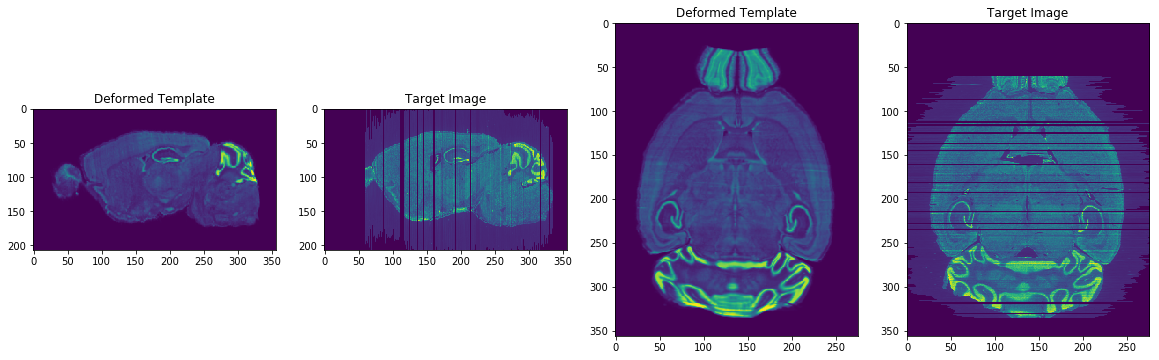

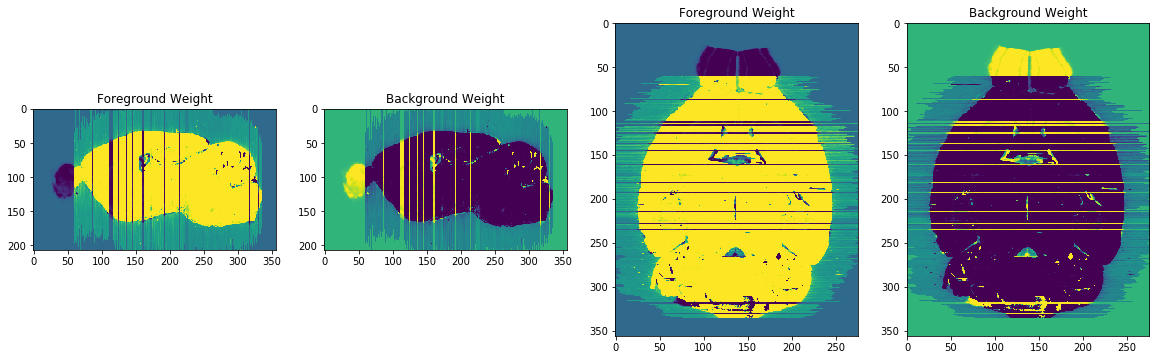

In [25]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
foreground_weight = lddmm.W[0][0].cpu().numpy()
background_weight = lddmm.W[0][1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[96,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[96,:,:])
plt.title('Target Image')
plt.show()

plt.figure()
plt.subplot(1,4,1)
plt.imshow(foreground_weight[:,:,100])
plt.title('Foreground Weight')
plt.subplot(1,4,2)
plt.imshow(background_weight[:,:,100])
plt.title('Background Weight')
plt.subplot(1,4,3)
plt.imshow(foreground_weight[96,:,:])
plt.title('Foreground Weight')
plt.subplot(1,4,4)
plt.imshow(background_weight[96,:,:])
plt.title('Background Weight')
plt.show()

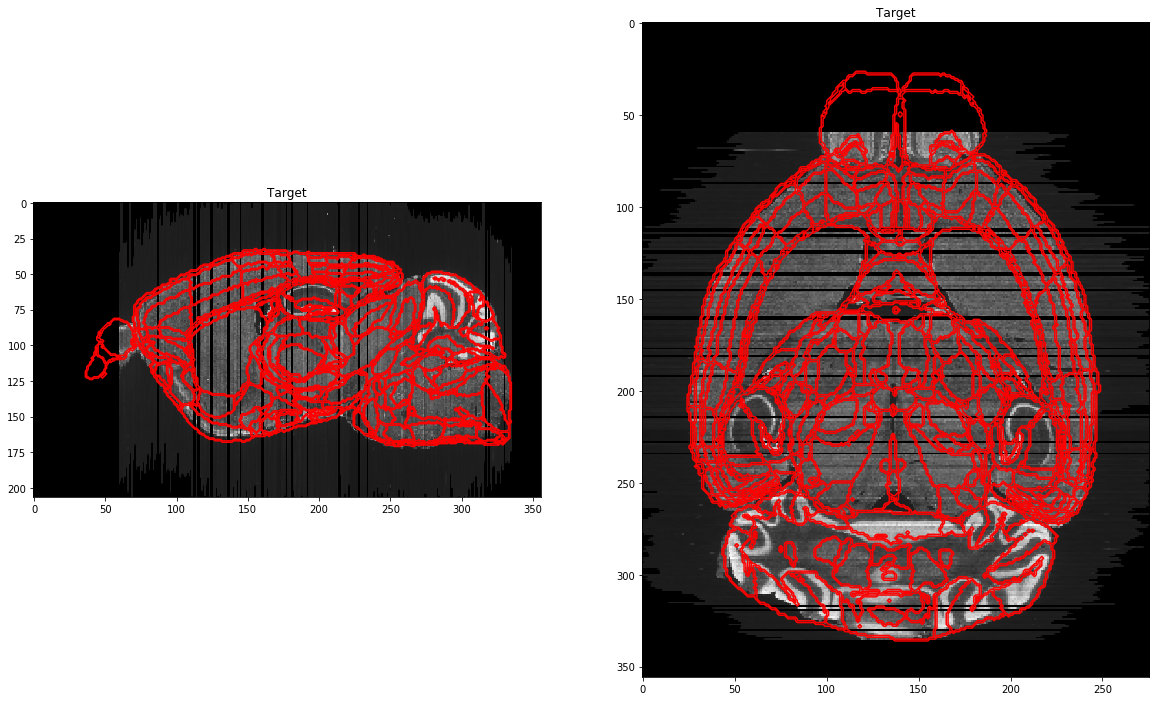

In [26]:
# load annotation
anno_file_name = '../notebook/mouse_template_annotation.img'
anno_image_struct = nib.load(anno_file_name)
anno_image = np.squeeze(anno_image_struct.get_data()).astype(np.float32)

# transform annotation based on current transform
deformed_anno,_,_,_ = lddmm.applyThisTransform(anno_image,interpmode='nearest')
deformed_anno = deformed_anno[-1].cpu().numpy()

# draw deformed annotation on target
levels = np.unique(deformed_anno[:,:,100])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(target_image[:,:,100],cmap='gray')
plt.title('Target')
for i in range(levels.shape[0]):
    plt.contour((deformed_anno[:,:,100]==levels[i])*1.0,0.999,colors='r')

levels = np.unique(deformed_anno[96,:,:])
plt.subplot(1,2,2)
plt.imshow(target_image[96,:,:],cmap='gray')
plt.title('Target')
for i in range(levels.shape[0]):
    plt.contour((deformed_anno[96,:,:]==levels[i])*1.0,0.999,colors='r')

plt.show()